<a href="https://colab.research.google.com/github/JackalWu2019/AGiXT/blob/main/Recursive_AI_Image_Generation_PUBLIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Style Chosen: natural


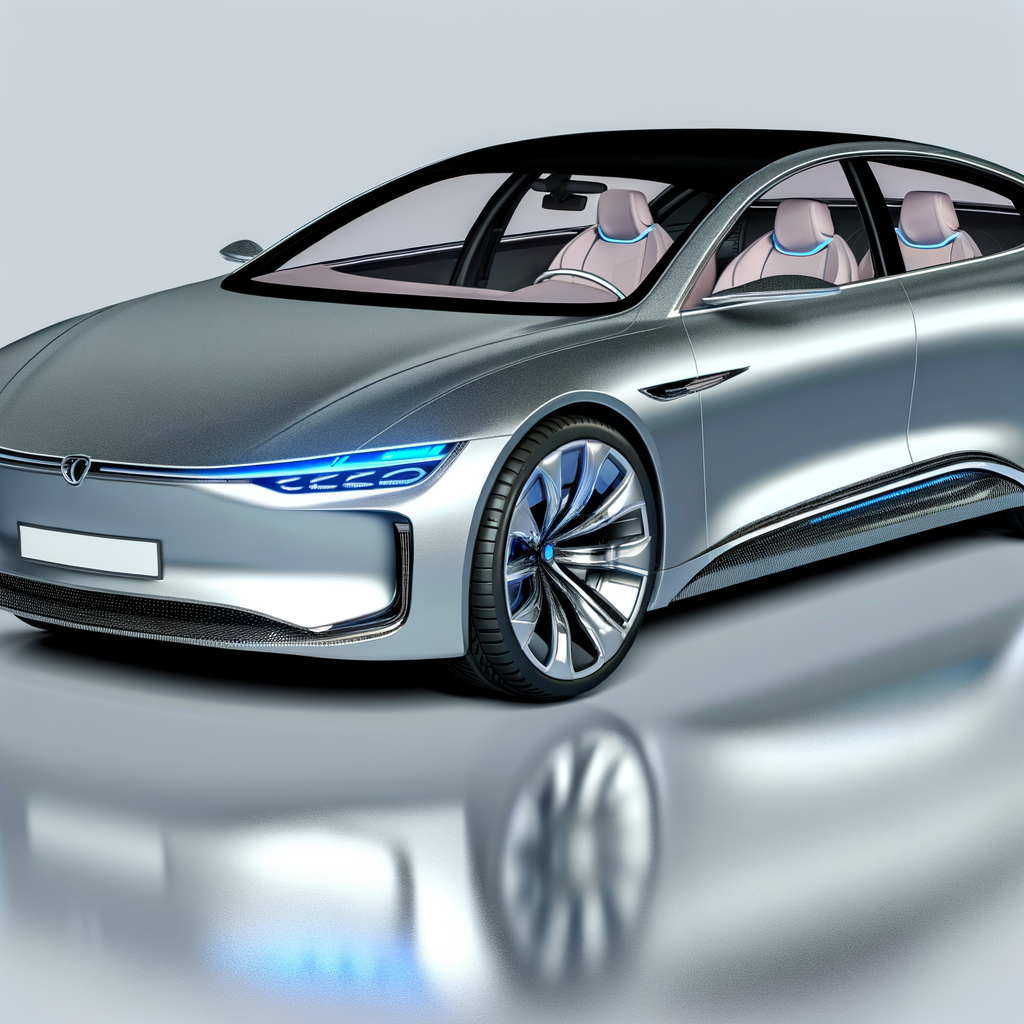

Suggestion: To improve this image, enhance the lighting to create stronger reflections and glimmers on the metallic paint and increase the contrast to accentuate the sleek body lines and the shine on the futuristic alloy wheels. Additionally, consider adding a dynamic background that suggests movement and provides a high-contrast backdrop to further emphasize the car's ultra-modern features and aerodynamic design.
Improved Prompt: Generate a detailed image of an ultra-modern car with enhanced lighting to create vivid reflections on its metallic paint, positioned at a slight angle to showcase its front and side views. Incorporate increased contrast to sharpen the body lines and intensify the glow on the state-of-the-art alloy wheels. Add a dynamic and high-contrast background that implies speed to accentuate the car's futuristic features and aerodynamic design.


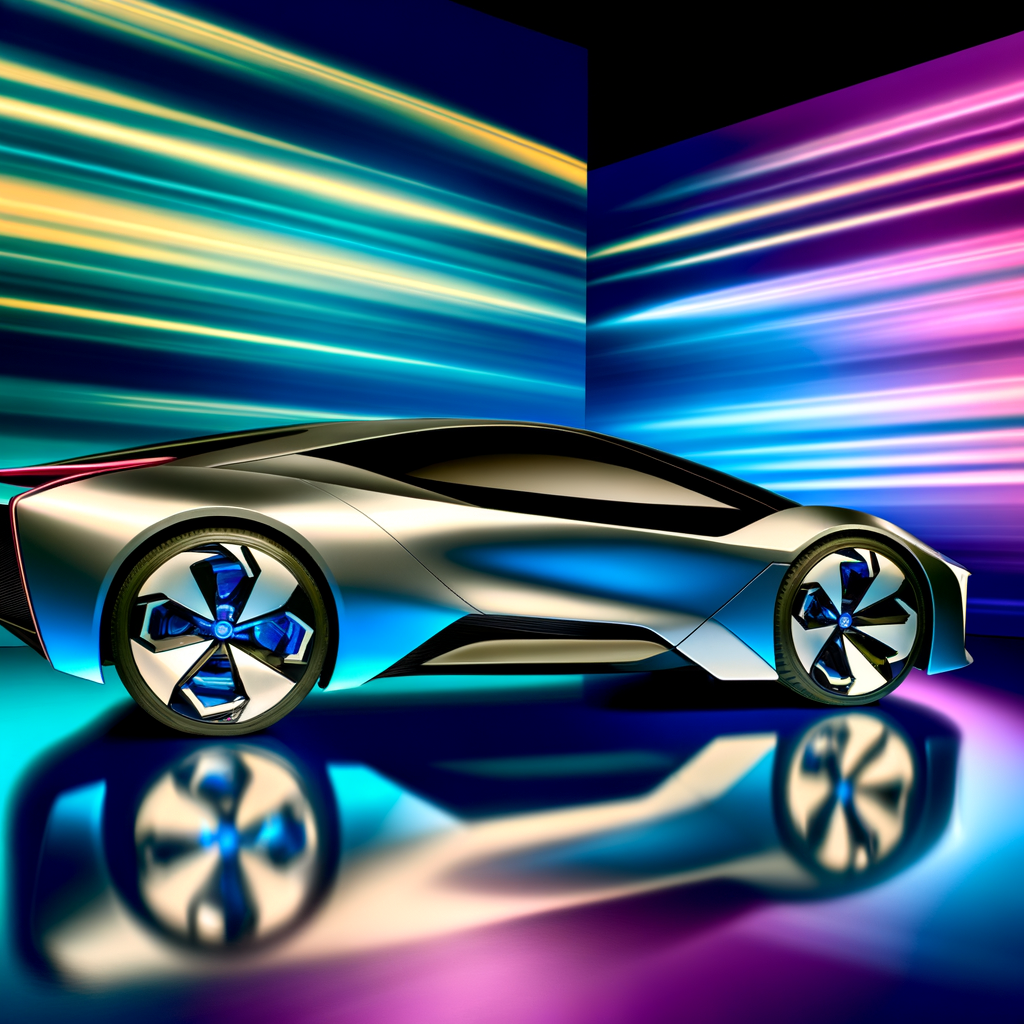

Suggestion: To improve the image, the car's lighting could be made more pronounced with brighter, more focused LEDs to create sharper reflections on the paint, and the contrast could be increased for a more striking definition of the body lines. Additionally, enhancing the background with more dynamic elements suggesting motion, like blurred lines conveying speed, would reinforce the high-velocity and futuristic theme.
Improved Prompt: Create an image of a hyper-modern car with intensified LED lighting that casts sharp, dynamic reflections on its high-gloss metallic surface. The body's sleek lines should be more dramatically contrasted to accentuate its sculpted design, and the background should feature blurred motion lines that suggest high velocity, enhancing the car's futuristic and aerodynamic look. The vehicle should be displayed at an angle showing the front and side for a complete view, with the enhanced rims reflecting the sophisticated lighting.


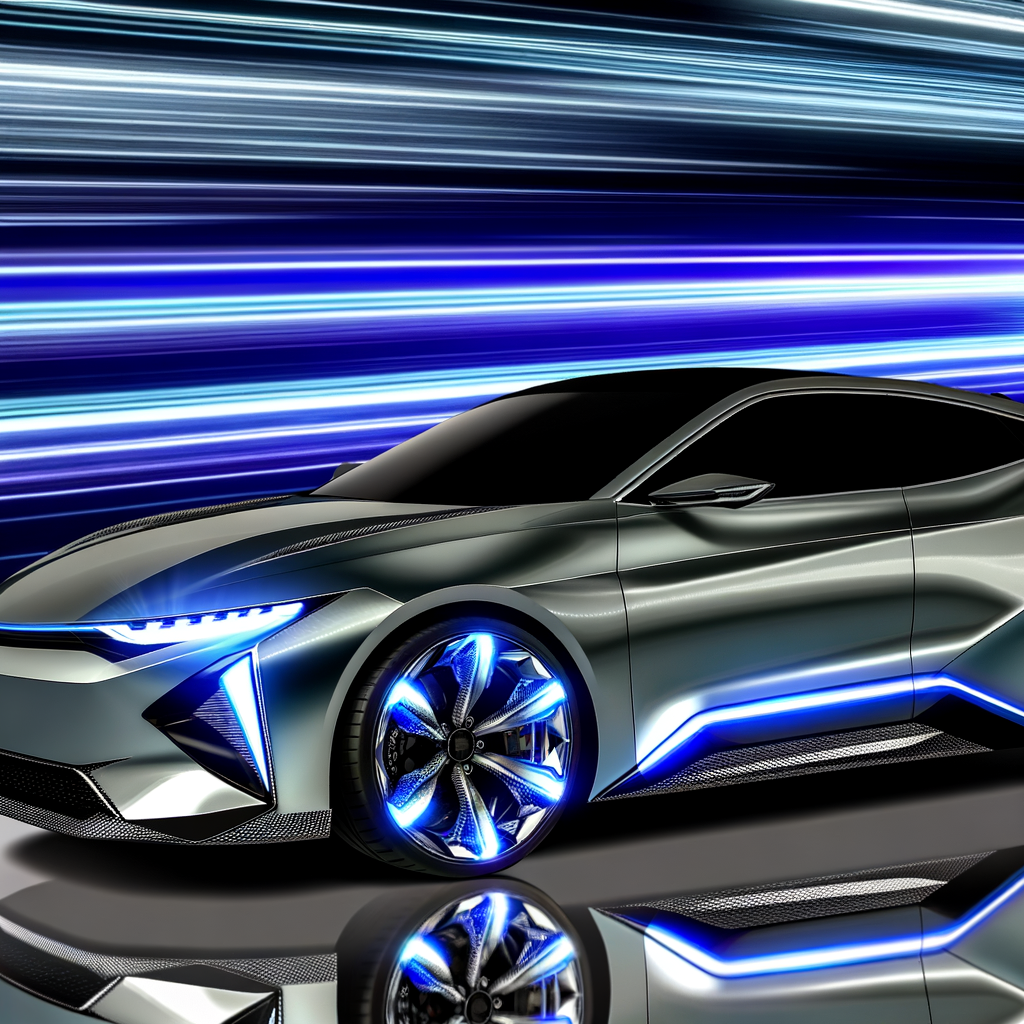

Suggestion: The image can be improved by enhancing the contrast of sleek lines on the car body to emphasize its molded design, and by intensifying the LED lighting around the vehicle's edges and implementing more intricate light play on the rims to reflect the complex lighting setup. Additionally, the motion lines in the background could be made more dynamic and varied to better imply high speed and a futuristic appeal.
Improved Prompt: Create an image of a cutting-edge car featuring enhanced LED lighting that underscores its shape, with intensified contrast on sharp, streamlined lines to highlight the vehicle's sculpted design. The car should be depicted from an angle that shows off both the front profile and flowing side lines, with the rims catching and reflecting the intricate LED lighting patterns. Include a background with more varied and dynamic motion blur lines that enhance the futuristic and high-speed aesthetic of the design.


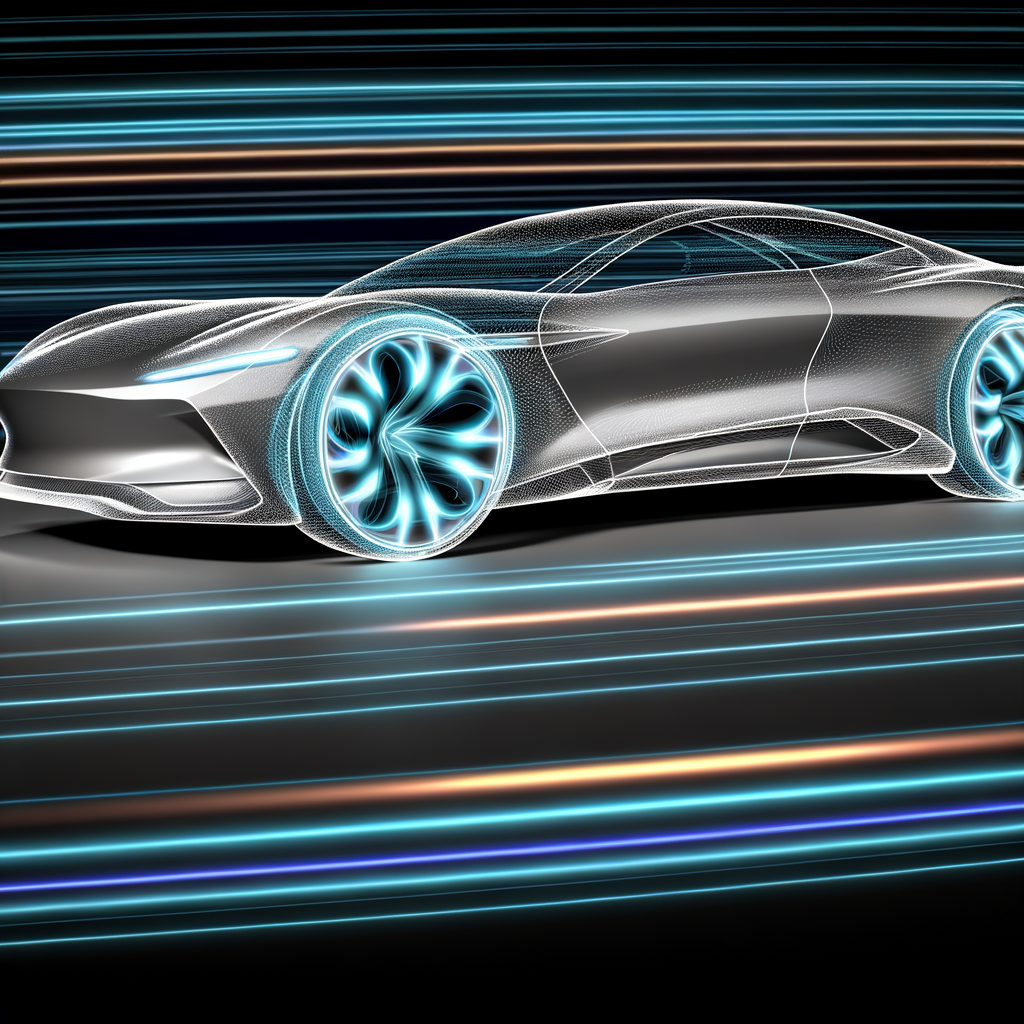

Suggestion: To improve the image, the car could feature more pronounced sculpted design elements and enhanced LED lighting accents, especially along the body lines, headlights, and within the interior visible through the windows. Increasing the intensity and complexity of the LED patterns on the rims and adding more dynamic, multi-directional motion blur lines in the background could better convey a sense of high speed and a futuristic aesthetic.
Improved Prompt: Generate an image of an ultra-modern car characterized by more aggressive sculpted design features and pronounced LED lighting that traces its body lines, headlights, and the interior visible through the car windows. The wheels should showcase intricate LED patterns that are vibrant and complex, reflecting off the car’s bodywork. Surround the vehicle with a backdrop of intense, multi-directional motion blur lines to enhance the sensation of high velocity and a high-tech environment.


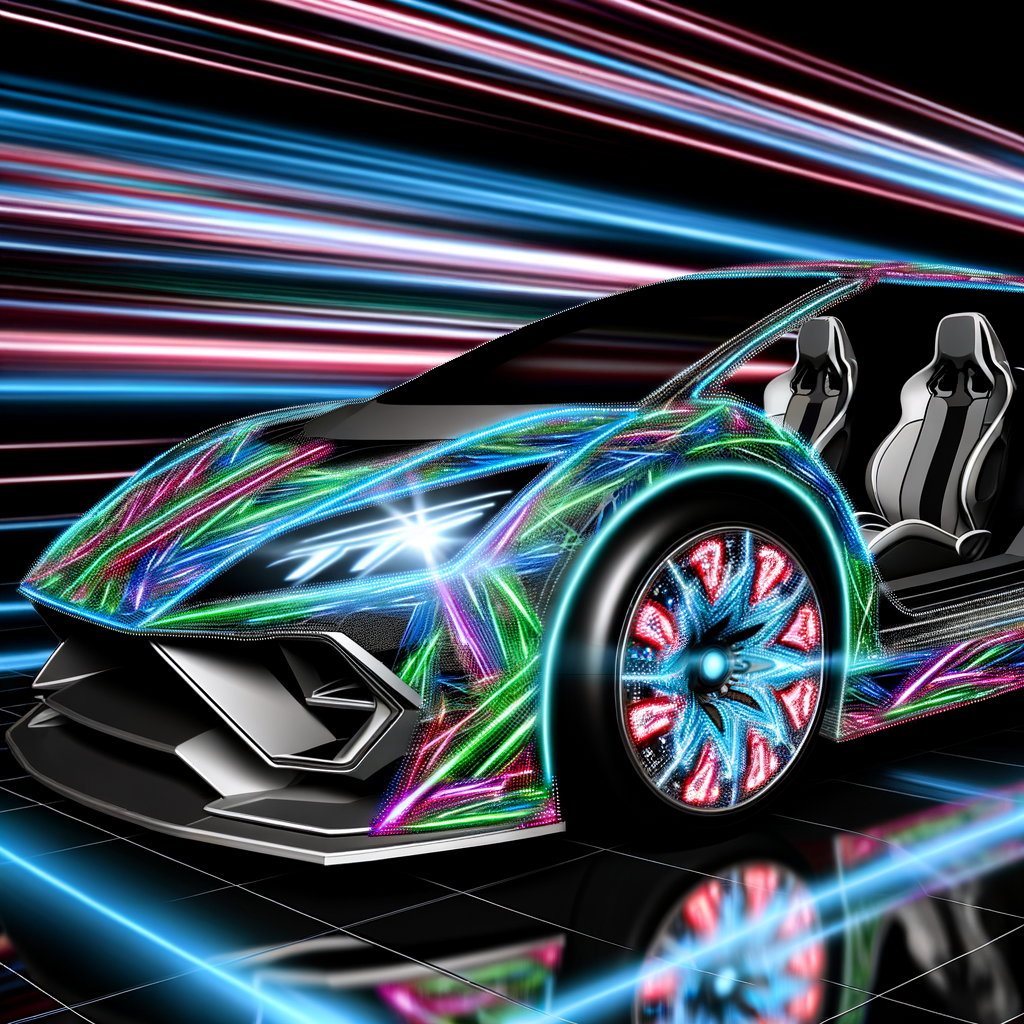

Suggestion: The image could be enhanced by adding more definition to the LED patterns on the wheels to make them appear more intricate and vibrant, as well as ensuring that the interior LEDs are clearly visible through the windows, promoting a cohesive illuminated effect between the interior and exterior. Additionally, the image could benefit from an even more dynamic motion blur effect in the background to intensify the sensation of speed and high-tech atmosphere.
Improved Prompt: Create an ultra-modern car with pronounced LED lighting tracing its sculpted bodywork and distinctive LED patterns on the wheels that are detailed and vibrant. The car's interior should be clearly visible and uniformly lit with LED light to match the vehicle's exterior glow. Intensify the background with a highly dynamic motion blur to convey an extreme sense of speed and futuristic ambiance.
Final prompt: Create an ultra-modern car with pronounced LED lighting tracing its sculpted bodywork and distinctive L

In [ ]:
#@title GPT Artist
prompt = 'Agents in west world' #@param {type:"string"}
openai_key = '' #@param {type:"string"}
steps = 5 #@param {type:"slider", min:1, max:10, step:1}

!pip install --upgrade openai > /dev/null

from openai import OpenAI
from PIL import Image
import requests
from io import BytesIO
import requests

client = OpenAI(api_key = openai_key)

def decide_natural_or_vivid(prompt):
    # Pass the image to GPT-4 Vision API to get suggestions
    response = client.chat.completions.create(
        model="gpt-4",
        messages=[
            {
                "role": "system",
                "content": "Given a prompt to generate an image, decide which type of image it should be: `natural` or `art`. `art` is more artistic, `natural` is more realistic."
            },
            {
                "role": "user",
                "content": "Prompt: `{prompt}`"
            },
        ],
        logit_bias = {
            '53980': 100, # 'natural' token
            '472': 100, # 'art' token
        },
        max_tokens=1,
        temperature=0,
    )

    # Get the suggestion
    output = response.choices[0].message.content
    print('Style Chosen:', output)

    if 'art' in output:
      return 'vivid'
    elif 'natural' in output:
      return 'natural'

def generate_image(prompt, style):
    # Generate an image with DALL-E
    response = client.images.generate(
        model="dall-e-3",
        prompt=prompt,
        size="1024x1024",
        quality="hd",
        style=style,
        n=1,
    )

    # Get the generated image URL
    image_url = response.data[0].url

    revised_prompt = response.data[0].revised_prompt

    return image_url, revised_prompt


def get_artistic_suggestion(image_url, prompt):
    # Pass the image to GPT-4 Vision API to get suggestions
    response = client.chat.completions.create(
        model="gpt-4-vision-preview",
        messages=[
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": f"In two sentences or less, how can this image be improved to better fit this prompt: `{prompt.strip()}`?"},
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": image_url,
                        },
                    },
                ],
            }
        ],
        max_tokens=250,
    )

    # Get the suggestion
    suggestion = response.choices[0].message.content
    print('Suggestion:', suggestion)

    # Create a new prompt
    response = client.chat.completions.create(
        model="gpt-4-vision-preview",
        messages=[
            {
                "role": "system",
                "content": "You are a system designed to generate prompts for image generation models. Always do exactly as you are told."
            },
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": f"Here is the current prompt that was used to generate this image: `{prompt}`.\n\nHere is a suggestion for improvement: `{suggestion}`.\n\nWrite a new prompt that incorporates the suggestion to generate a better image. Make it clear, and three sentences or less. Don't mention that there have been other prompts, just describe what you want the new image to look like."},
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": image_url,
                        },
                    },
                ],
            }
        ],
        max_tokens=250,
    )

    # Get the improved prompt
    improved_prompt = response.choices[0].message.content

    print('Improved Prompt:', improved_prompt)

    return improved_prompt


def gpt_artist(prompt, steps):
    style = decide_natural_or_vivid(prompt)

    for i in range(steps):
        try:
          # Generate an image
          image_url, prompt = generate_image(prompt, style)

          # Show the image
          response = requests.get(image_url)
          img = Image.open(BytesIO(response.content))
          display(img)

          # Get artistic suggestion
          prompt = get_artistic_suggestion(image_url, prompt)
        except:
          try:
            # Generate an image
            image_url, prompt = generate_image(prompt, style)

            # Show the image
            response = requests.get(image_url)
            img = Image.open(BytesIO(response.content))
            display(img)

            # Get artistic suggestion
            prompt = get_artistic_suggestion(image_url, prompt)
          except:
            # Generate an image
            image_url, prompt = generate_image(prompt, style)

            # Show the image
            response = requests.get(image_url)
            img = Image.open(BytesIO(response.content))
            display(img)

            # Get artistic suggestion
            prompt = get_artistic_suggestion(image_url, prompt)

    return prompt

# Test the 'gpt-artist'
final_prompt = gpt_artist(prompt, steps)
print("Final prompt:", final_prompt)